In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, RepeatVector, TimeDistributed
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
data = pd.read_parquet(prom_file_path)

In [38]:
data.head()

,id,timestamp,node,node_time_seconds,node_load15,surfsara_power_usage,up,node_netstat_Tcp_OutSegs,node_netstat_Tcp_InErrs,node_context_switches_total,node_load5,node_load1,node_memory_Active_bytes,node_netstat_Tcp_RetransSegs,node_netstat_Udp_InErrors,node_memory_Dirty_bytes,surfsara_ambient_temp,node_netstat_Icmp_InMsgs,node_netstat_Udp_InDatagrams,node_intr_total,node_netstat_Tcp_InSegs,node_memory_Percpu_bytes,node_boot_time_seconds,node_netstat_Udp_OutDatagrams,node_netstat_Icmp_InErrors,node_procs_blocked,node_netstat_Icmp_OutMsgs,node_memory_MemFree_bytes,node_procs_running,node_forks_total,node_hwmon_temp_celsius-min,node_hwmon_temp_celsius-mean,node_hwmon_temp_celsius-max,node_filesystem_avail_bytes-sum,node_filesystem_files-sum,node_network_transmit_bytes_total-sum,node_filesystem_device_error-sum,node_disk_written_bytes_total-sum,node_filesystem_free_bytes-sum,node_thermal_zone_temp-min,node_thermal_zone_temp-mean,node_thermal_zone_temp-max,node_disk_read_bytes_total-sum,nvidia_gpu_memory_used_bytes-sum,nvidia_gpu_temperature_celsius-min,nvidia_gpu_temperature_celsius-mean,nvidia_gpu_temperature_celsius-max,node_arp_entries-sum,nvidia_gpu_fanspeed_percent-min,nvidia_gpu_fanspeed_percent-mean,nvidia_gpu_fanspeed_percent-max,node_filesystem_files_free-sum,nvidia_gpu_power_usage_milliwatts-min,nvidia_gpu_power_usage_milliwatts-sum,nvidia_gpu_power_usage_milliwatts-mean,nvidia_gpu_power_usage_milliwatts-max,node_filesystem_size_bytes-sum,node_disk_writes_completed_total-sum,nvidia_gpu_duty_cycle-min,nvidia_gpu_duty_cycle-mean,nvidia_gpu_duty_cycle-max,node_network_transmit_packets_total-sum,node_udp_queues-sum,node_network_receive_bytes_total-sum,node_network_receive_packets_total-sum,node_network_receive_multicast_total-sum,node_disk_io_now-sum,node_rapl_package_joules_total-sum,node_network_receive_drop_total-sum
118938007,25224420,2022-08-02 14:13:00,r11n5,1.659450e+09,1.0,92.0,1.0,5.297260e+09,0.0,3.665660e+10,1.01,1.0,3.685040e+09,17675800.0,0.0,8192.0,24.0,57.0,55940.0,8.764500e+09,4.663830e+09,14090200.0,1.657200e+09,127809.0,0.0,0.0,64.0,8.850210e+10,17.0,10347400.0,33.0,35.65,45.0,1.880105e+12,230697006.0,2.490132e+13,0.0,1.020846e+12,1.880159e+12,48.0,48.0,48.0,3.950375e+10,0.0,NaN,NaN,NaN,182.0,NaN,NaN,NaN,230052407.0,NaN,0.0,NaN,NaN,1.912248e+12,4082128.0,NaN,NaN,NaN,5.315279e+09,0.0,2.371420e+13,5.282081e+09,2.0,0.0,193230.12,0.0
118938242,25224421,2022-08-02 14:13:30,r11n5,1.659450e+09,1.0,92.0,1.0,5.297260e+09,0.0,3.665660e+10,1.01,1.0,3.686830e+09,17675800.0,0.0,12288.0,24.0,57.0,55940.0,8.764520e+09,4.663830e+09,14090200.0,1.657200e+09,127809.0,0.0,0.0,64.0,8.850220e+10,11.0,10347500.0,33.0,35.65,45.0,1.880105e+12,230697006.0,2.490132e+13,0.0,1.020846e+12,1.880159e+12,49.0,49.0,49.0,3.950375e+10,0.0,NaN,NaN,NaN,182.0,NaN,NaN,NaN,230052407.0,NaN,0.0,NaN,NaN,1.912248e+12,4082133.0,NaN,NaN,NaN,5.315279e+09,0.0,2.371420e+13,5.282081e+09,2.0,0.0,194835.48,0.0
118938492,25224422,2022-08-02 14:14:00,r11n5,1.659450e+09,1.0,92.0,1.0,5.297260e+09,0.0,3.665660e+10,1.01,1.0,3.686210e+09,17675800.0,0.0,8192.0,24.0,57.0,55940.0,8.764530e+09,4.663830e+09,14090200.0,1.657200e+09,127809.0,0.0,0.0,64.0,8.850290e+10,13.0,10347500.0,33.0,35.71,44.0,1.880105e+12,230697006.0,2.490132e+13,0.0,1.020846e+12,1.880159e+12,46.0,46.0,46.0,3.950375e+10,0.0,NaN,NaN,NaN,182.0,NaN,NaN,NaN,230052407.0,NaN,0.0,NaN,NaN,1.912248e+12,4082137.0,NaN,NaN,NaN,5.315279e+09,0.0,2.371420e+13,5.282081e+09,2.0,0.0,196441.06,0.0
118938750,25224423,2022-08-02 14:14:30,r11n5,1.659450e+09,1.0,92.0,1.0,5.297260e+09,0.0,3.665660e+10,1.00,1.0,3.686000e+09,17675800.0,0.0,12288.0,24.0,57.0,55940.0,8.764540e+09,4.663830e+09,14090200.0,1.657200e+09,127809.0,0.0,0.0,64.0,8.850230e+10,13.0,10347500.0,33.0,35.76,45.0,1.880105e+12,230697006.0,2.490132e+13,0.0,1.020846e+12,1.880159e+12,46.0,46.0,46.0,3.950375e+10,0.0,NaN,NaN,NaN,182.0,NaN,NaN,NaN,230052407.0,NaN,0.0,NaN,NaN,1.912248e+12,4082140.0,NaN,NaN,NaN,5.315279e+09,0.0,2.371420e+13,5.282081e+09,2.0,0.0,198046.

In [39]:
data.columns

Index(['id', 'timestamp', 'node', 'node_time_seconds', 'node_load15',
       'surfsara_power_usage', 'up', 'node_netstat_Tcp_OutSegs',
       'node_netstat_Tcp_InErrs', 'node_context_switches_total', 'node_load5',
       'node_load1', 'node_memory_Active_bytes',
       'node_netstat_Tcp_RetransSegs', 'node_netstat_Udp_InErrors',
       'node_memory_Dirty_bytes', 'surfsara_ambient_temp',
       'node_netstat_Icmp_InMsgs', 'node_netstat_Udp_InDatagrams',
       'node_intr_total', 'node_netstat_Tcp_InSegs',
       'node_memory_Percpu_bytes', 'node_boot_time_seconds',
       'node_netstat_Udp_OutDatagrams', 'node_netstat_Icmp_InErrors',
       'node_procs_blocked', 'node_netstat_Icmp_OutMsgs',
       'node_memory_MemFree_bytes', 'node_procs_running', 'node_forks_total',
       'node_hwmon_temp_celsius-min', 'node_hwmon_temp_celsius-mean',
       'node_hwmon_temp_celsius-max', 'node_filesystem_avail_bytes-sum',
       'node_filesystem_files-sum', 'node_network_transmit_bytes_total-sum',
   

In [40]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [41]:
# Assuming 'data' is your numpy array and 'column_names' is your list of column names
column_names = ['id', 'timestamp', 'node', 'node_time_seconds', 'node_load15',
       'surfsara_power_usage', 'up', 'node_netstat_Tcp_OutSegs',
       'node_netstat_Tcp_InErrs', 'node_context_switches_total', 'node_load5',
       'node_load1', 'node_memory_Active_bytes',
       'node_netstat_Tcp_RetransSegs', 'node_netstat_Udp_InErrors',
       'node_memory_Dirty_bytes', 'surfsara_ambient_temp',
       'node_netstat_Icmp_InMsgs', 'node_netstat_Udp_InDatagrams',
       'node_intr_total', 'node_netstat_Tcp_InSegs',
       'node_memory_Percpu_bytes', 'node_boot_time_seconds',
       'node_netstat_Udp_OutDatagrams', 'node_netstat_Icmp_InErrors',
       'node_procs_blocked', 'node_netstat_Icmp_OutMsgs',
       'node_memory_MemFree_bytes', 'node_procs_running', 'node_forks_total',
       'node_hwmon_temp_celsius-min', 'node_hwmon_temp_celsius-mean',
       'node_hwmon_temp_celsius-max', 'node_filesystem_avail_bytes-sum',
       'node_filesystem_files-sum', 'node_network_transmit_bytes_total-sum',
       'node_filesystem_device_error-sum', 'node_disk_written_bytes_total-sum',
       'node_filesystem_free_bytes-sum', 'node_thermal_zone_temp-min',
       'node_thermal_zone_temp-mean', 'node_thermal_zone_temp-max',
       'node_disk_read_bytes_total-sum', 'nvidia_gpu_memory_used_bytes-sum',
       'nvidia_gpu_temperature_celsius-min',
       'nvidia_gpu_temperature_celsius-mean',
       'nvidia_gpu_temperature_celsius-max', 'node_arp_entries-sum',
       'nvidia_gpu_fanspeed_percent-min', 'nvidia_gpu_fanspeed_percent-mean',
       'nvidia_gpu_fanspeed_percent-max', 'node_filesystem_files_free-sum',
       'nvidia_gpu_power_usage_milliwatts-min',
       'nvidia_gpu_power_usage_milliwatts-sum',
       'nvidia_gpu_power_usage_milliwatts-mean',
       'nvidia_gpu_power_usage_milliwatts-max',
       'node_filesystem_size_bytes-sum',
       'node_disk_writes_completed_total-sum', 'nvidia_gpu_duty_cycle-min',
       'nvidia_gpu_duty_cycle-mean', 'nvidia_gpu_duty_cycle-max',
       'node_network_transmit_packets_total-sum', 'node_udp_queues-sum',
       'node_network_receive_bytes_total-sum',
       'node_network_receive_packets_total-sum',
       'node_network_receive_multicast_total-sum', 'node_disk_io_now-sum',
       'node_rapl_package_joules_total-sum',
       'node_network_receive_drop_total-sum']  
df = pd.DataFrame(data, columns=column_names)

In [42]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [43]:
df = df.drop(columns=['node'])
# Now you can compute the correlation matrix
correlation_matrix = df.corr()

# To see how each feature correlates with the target:
target = 'node_load15'  
correlations_with_target = correlation_matrix[target]
print(correlations_with_target)

id                                          0.102210
timestamp                                   0.106201
node_time_seconds                           0.106144
node_load15                                 1.000000
surfsara_power_usage                        0.859989
up                                               NaN
node_netstat_Tcp_OutSegs                    0.278504
node_netstat_Tcp_InErrs                          NaN
node_context_switches_total                 0.192841
node_load5                                  0.991586
node_load1                                  0.972269
node_memory_Active_bytes                    0.104435
node_netstat_Tcp_RetransSegs                0.304369
node_netstat_Udp_InErrors                        NaN
node_memory_Dirty_bytes                    -0.013862
surfsara_ambient_temp                            NaN
node_netstat_Icmp_InMsgs                         NaN
node_netstat_Udp_InDatagrams                0.071638
node_intr_total                             0.

In [44]:
relevant_features = correlations_with_target[correlations_with_target > 0.5]
print(relevant_features)

node_load15                     1.000000
surfsara_power_usage            0.859989
node_load5                      0.991586
node_load1                      0.972269
node_procs_running              0.704132
node_hwmon_temp_celsius-min     0.902619
node_hwmon_temp_celsius-mean    0.891965
node_hwmon_temp_celsius-max     0.792838
node_thermal_zone_temp-min      0.728196
node_thermal_zone_temp-mean     0.728196
node_thermal_zone_temp-max      0.728196
Name: node_load15, dtype: float64


Epoch 1/20
90/90 [==============================] - 2s 10ms/step - loss: 0.1062 - val_loss: 0.0073
Epoch 2/20
90/90 [==============================] - 1s 8ms/step - loss: 0.0049 - val_loss: 0.0066
Epoch 3/20
90/90 [==============================] - 1s 8ms/step - loss: 0.0040 - val_loss: 0.0061
Epoch 4/20
90/90 [==============================] - 1s 8ms/step - loss: 0.0037 - val_loss: 0.0055
Epoch 5/20
90/90 [==============================] - 1s 8ms/step - loss: 0.0035 - val_loss: 0.0057
Epoch 6/20
90/90 [==============================] - 1s 8ms/step - loss: 0.0033 - val_loss: 0.0050
Epoch 7/20
90/90 [==============================] - 1s 8ms/step - loss: 0.0032 - val_loss: 0.0047
Epoch 8/20
90/90 [==============================] - 1s 8ms/step - loss: 0.0030 - val_loss: 0.0046
Epoch 9/20
90/90 [==============================] - 1s 8ms/step - loss: 0.0029 - val_loss: 0.0046
Epoch 10/20
90/90 [==============================] - 1s 8ms/step - loss: 0.0028 - val_loss: 0.0045
Epoch 11/20
90/90 

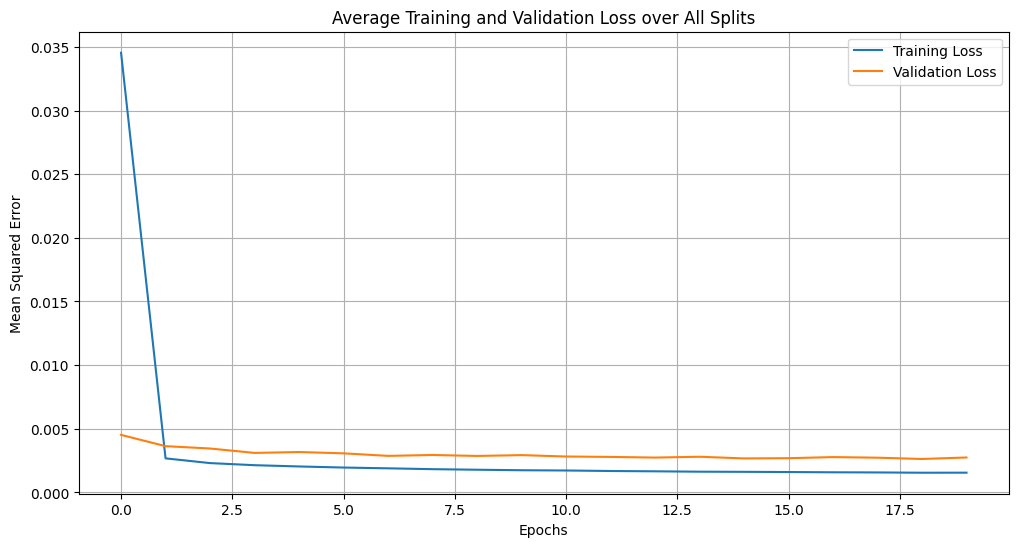

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming df is your data frame
# Relevant Features
features = ['node_load15', 'surfsara_power_usage', 'node_load5','node_load1','node_procs_running','node_hwmon_temp_celsius-min','node_hwmon_temp_celsius-mean','node_thermal_zone_temp-mean']  # add or remove features as required
x = df[features].values


scaler_x = MinMaxScaler()
scaler_y1 = MinMaxScaler()
scaler_y2 = MinMaxScaler()

# Normalize your data
scalers_x = {}
for i in range(x.shape[1]):
    scaler = MinMaxScaler()
    x[:, i] = scaler.fit_transform(x[:, i].reshape(-1, 1)).squeeze()
    scalers_x[features[i]] = scaler

y1 = np.array(df['surfsara_power_usage']).reshape(-1, 1)
y2 = np.array(df['node_hwmon_temp_celsius-mean']).reshape(-1, 1)
y1 = scaler_y1.fit_transform(y1)
y2 = scaler_y2.fit_transform(y2)

y = np.concatenate((y1, y2), axis=1)

def create_dataset_with_avg(X, y, time_steps, lags):
    Xs, ys = [], []
    for i in range(len(X) - time_steps - lags + 1):
        v = X[i:(i + time_steps), :]
        Xs.append(v)
        
        avg_next_4_y1 = np.mean(y[i + time_steps:i + time_steps + lags, 0])
        avg_next_4_y2 = np.mean(y[i + time_steps:i + time_steps + lags, 1])
        
        ys.append([avg_next_4_y1, avg_next_4_y2])
    return np.array(Xs), np.array(ys)

time_steps = 5

X, Y = create_dataset_with_avg(x, y, time_steps, 2)

def create_model(num_features):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(time_steps, num_features)))
    model.add(Dense(2))
    model.compile(optimizer='adam', loss='mse')
    return model

# Time series cross-validator
tscv = TimeSeriesSplit(n_splits=5)

mse_scores = []
train_loss_list = []
val_loss_list = []

for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    # Split the training data further into training and validation sets
    train_size = int(len(X_train) * 0.8)
    X_train_partial, X_val = X_train[:train_size], X_train[train_size:]
    y_train_partial, y_val = y_train[:train_size], y_train[train_size:]

    model = create_model(len(features))
    history = model.fit(X_train_partial, y_train_partial, batch_size=64, epochs=20, verbose=1, validation_data=(X_val, y_val))

    train_loss_list.append(history.history['loss'])
    val_loss_list.append(history.history['val_loss'])

    y_pred = model.predict(X_test)

    # Revert the prediction to the original scale
    y_test = np.concatenate((scaler_y1.inverse_transform(y_test[:, 0:1]), 
                             scaler_y2.inverse_transform(y_test[:, 1:2])), axis=1)
    y_pred = np.concatenate((scaler_y1.inverse_transform(y_pred[:, 0:1]), 
                             scaler_y2.inverse_transform(y_pred[:, 1:2])), axis=1)

    # Compute the mean squared error for each target
    mse1 = mean_squared_error(y_test[:, 0], y_pred[:, 0])
    mse2 = mean_squared_error(y_test[:, 1], y_pred[:, 1])
    rmse1 = np.sqrt(mse1)
    rmse2 = np.sqrt(mse2)
    mse_scores.append((mse1, mse2, rmse1, rmse2))

print("Mean MSE over all splits for target 1: ", np.mean([mse[0] for mse in mse_scores]))
print("Mean MSE over all splits for target 2: ", np.mean([mse[1] for mse in mse_scores]))
print("Mean RMSE over all splits for target 1: ", np.mean([mse[2] for mse in mse_scores]))
print("Mean RMSE over all splits for target 2: ", np.mean([mse[3] for mse in mse_scores]))

avg_train_loss = np.mean(train_loss_list, axis=0)
avg_val_loss = np.mean(val_loss_list, axis=0)

plt.figure(figsize=(12,6))
plt.plot(avg_train_loss, label='Training Loss')
plt.plot(avg_val_loss, label='Validation Loss')
plt.title('Average Training and Validation Loss over All Splits')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()  


In [49]:
def relative_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# ... [rest of your previous code]

# After predictions are made and inverse scaled:
re1 = relative_error(y_test[:, 0], y_pred[:, 0])
re2 = relative_error(y_test[:, 1], y_pred[:, 1])

print("Mean Relative Error over all splits for target 1: ", re1)
print("Mean Relative Error over all splits for target 2: ", re2)


Mean Relative Error over all splits for target 1:  3.939949693430584
Mean Relative Error over all splits for target 2:  2.6326494709499757


In [50]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# def plot_actual_vs_predicted(actual, predicted, title):
#     plt.figure(figsize=(8, 8))
    
#     # Scatter plot
#     sns.scatterplot(x=actual, y=predicted, alpha=0.6)
    
#     # Diagonal line
#     max_val = max(actual.max(), predicted.max())
#     min_val = min(actual.min(), predicted.min())
#     plt.plot([min_val, max_val], [min_val, max_val], '--', color='gray', linewidth=2)
    
#     plt.xlabel('Actual Values')
#     plt.ylabel('Predicted Values')
#     plt.grid(True)
#     plt.show()

# # For y1
# plot_actual_vs_predicted(y_test[:, 0], y_pred[:, 0], 'Actual vs Predicted for y1')

# # For y2
# plot_actual_vs_predicted(y_test[:, 1], y_pred[:, 1], 'Actual vs Predicted for y2')


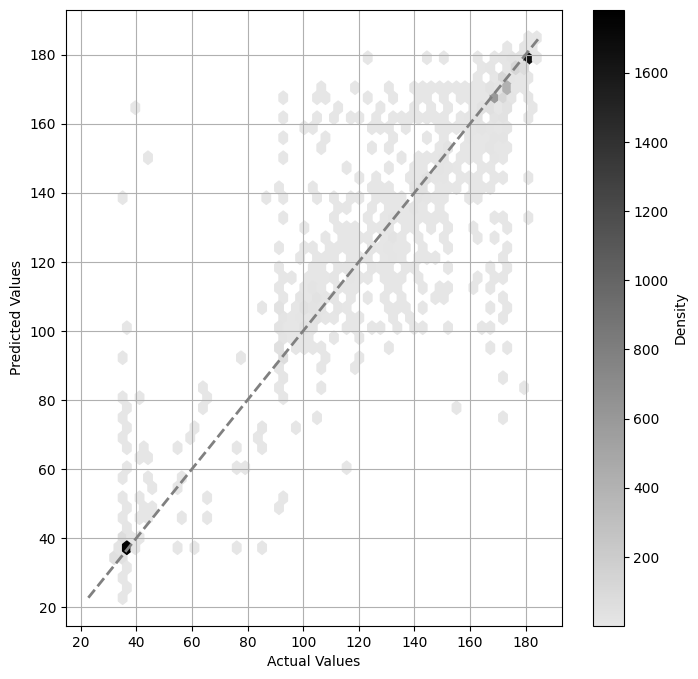

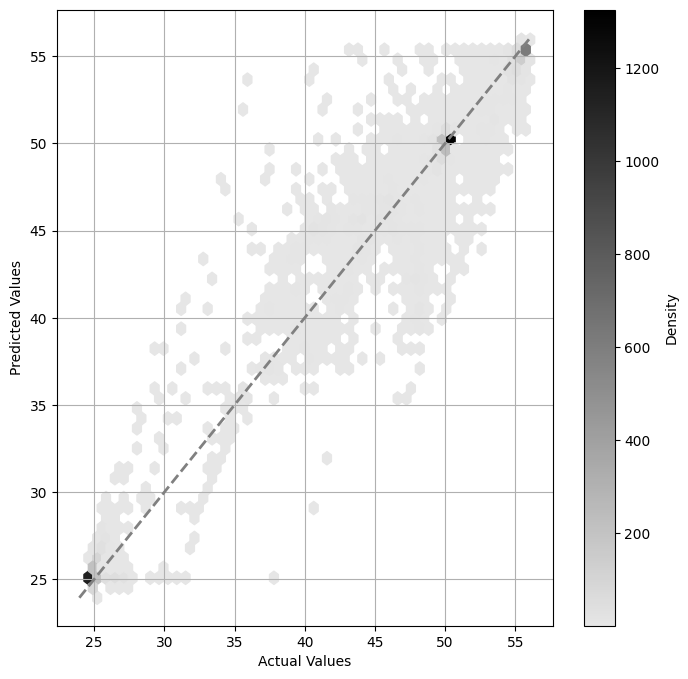

In [51]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def plot_actual_vs_predicted(actual, predicted, title):
    plt.figure(figsize=(8, 8))
    
    # Custom colormap: start with lighter gray and progress to black
    colors = [(0.9, 0.9, 0.9), (0.6, 0.6, 0.6), (0.3, 0.3, 0.3), (0.0, 0.0, 0.0)]
    cmap_name = "custom_light_to_dark_gray"
    cm = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=256)

    # Hexbin plot with custom colormap
    hb = plt.hexbin(actual, predicted, gridsize=50, cmap=cm, mincnt=1)
    cb = plt.colorbar(hb)
    cb.set_label('Density')
    
    # Diagonal line
    max_val = max(actual.max(), predicted.max())
    min_val = min(actual.min(), predicted.min())
    plt.plot([min_val, max_val], [min_val, max_val], '--', color='gray', linewidth=2)  # Changed to red for contrast
    
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)

    plt.show()

# For y1
plot_actual_vs_predicted(y_test[:, 0], y_pred[:, 0], 'Actual vs Predicted for y1')

# For y2
plot_actual_vs_predicted(y_test[:, 1], y_pred[:, 1], 'Actual vs Predicted for y2')
